# Analysis of similarity matrix - cosine similarity

In [1]:
import os
curdir = os.getcwd()
os.chdir('../../codes/')
from src.utils import models_to_architecture_mapping
os.chdir(curdir)

In [2]:
import pandas as pd

path = '20240410_1129_similarity_matrix_gradcam_cosine.csv'

df = pd.read_csv(path, index_col=0)
df

,DeiT_S,DeiT_T,DenseNet121,EfficientNet_B3,EfficientNet_B4,ConvNeXtV2_Nano,PyramidViT_V2_B2,MobileNetV3,Swin_T,ResNet18,ResNet50,ResNeXt50,Res2Net50,ViT_B_32
DeiT_S,1.000001,0.684066,0.690076,0.667361,0.416839,0.601369,0.645571,0.715444,0.705328,0.695281,0.695400,0.621784,0.672577,0.534617
DeiT_T,0.684066,1.000001,0.670430,0.639550,0.411262,0.589886,0.610265,0.699185,0.680542,0.690425,0.674569,0.587114,0.646447,0.525527
DenseNet121,0.690076,0.670430,1.000000,0.861845,0.522516,0.679558,0.860089,0.859496,0.849883,0.889771,0.891916,0.784414,0.935849,0.620629
EfficientNet_B3,0.667361,0.639550,0.861845,1.000001,0.495959,0.650808,0.773368,0.831616,0.827207,0.863355,0.877685,0.825775,0.881132,0.599339
EfficientNet_B4,0.416839,0.411262,0.522516,0.495959,1.000001,0.426555,0.466508,0.528630,0.487681,0.516514,0.511232,0.437575,0.510238,0.360847
ConvNeXtV2_Nano,0.601369,0.589886,0.679558,0.650808,0.426555,1.000001,0.603739,0.733719,0.675725,0.719032,0.695809,0.624852,0.640502,0.511964
PyramidViT_V2_B2,0.645571,0.610265,0.860089,0.773368,0.466508,0.603739,1.000000,0.772993,0.803295,0.778518,0.785943,0.690941,0.845284,0.577098
MobileNetV3,0.715444,0.699185,0.859496,0.831616,0.528630,0.733719,0.772993,1.000000,0.833865,0.868311,0.861917,0.760737,0.837431,0.630454
Swin_T,0.705328,0.680542,0.849883,0.827207,0.487681,0.675725,0.803295,0.833865,1.000001,0.864847,0.885037,0.780348,0.819379,0.609609
ResNet18,0.695281,0.690425,0.889771,0.863355,0.516514,0.719032,0.778518,0.868311,0.864847,1.000001,0.912544,0.799634,0.860302,0.618115


## Heatmap

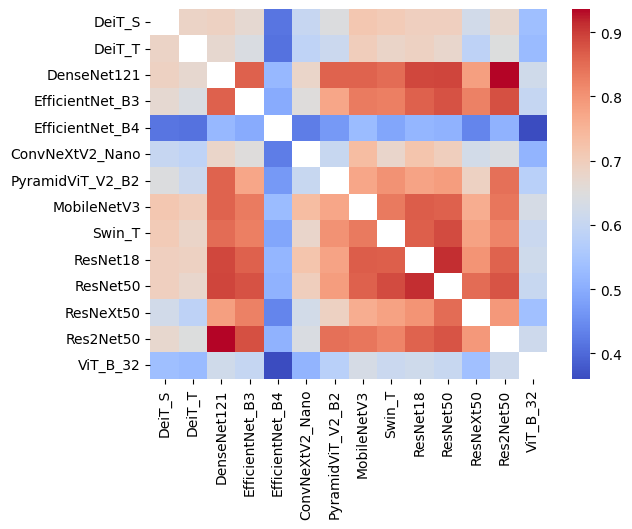

In [3]:
# plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mask = np.eye(df.shape[0], dtype=bool)
sns.heatmap(df, mask=mask, cmap='coolwarm')
plt.show()

## PCA of distances

In [4]:
# PCA of distances
df_distances = 1 - df
df_distances

,DeiT_S,DeiT_T,DenseNet121,EfficientNet_B3,EfficientNet_B4,ConvNeXtV2_Nano,PyramidViT_V2_B2,MobileNetV3,Swin_T,ResNet18,ResNet50,ResNeXt50,Res2Net50,ViT_B_32
DeiT_S,-7.152557e-07,3.159342e-01,3.099245e-01,3.326392e-01,0.583161,3.986307e-01,3.544286e-01,2.845564e-01,2.946719e-01,3.047190e-01,3.046000e-01,0.378216,3.274231e-01,0.465383
DeiT_T,3.159342e-01,-7.152557e-07,3.295701e-01,3.604496e-01,0.588738,4.101137e-01,3.897348e-01,3.008152e-01,3.194578e-01,3.095751e-01,3.254305e-01,0.412886,3.535530e-01,0.474473
DenseNet121,3.099245e-01,3.295701e-01,-3.576279e-07,1.381549e-01,0.477484,3.204416e-01,1.399106e-01,1.405041e-01,1.501166e-01,1.102290e-01,1.080844e-01,0.215586,6.415069e-02,0.379371
EfficientNet_B3,3.326392e-01,3.604496e-01,1.381549e-01,-5.960464e-07,0.504041,3.491918e-01,2.266318e-01,1.683843e-01,1.727933e-01,1.366448e-01,1.223148e-01,0.174225,1.188682e-01,0.400661
EfficientNet_B4,5.831613e-01,5.887376e-01,4.774838e-01,5.040414e-01,-0.000001,5.734445e-01,5.334916e-01,4.713699e-01,5.123194e-01,4.834859e-01,4.887675e-01,0.562425,4.897621e-01,0.639153
ConvNeXtV2_Nano,3.986307e-01,4.101137e-01,3.204416e-01,3.491918e-01,0.573445,-9.536743e-07,3.962615e-01,2.662808e-01,3.242749e-01,2.809677e-01,3.041909e-01,0.375148,3.594977e-01,0.488036
PyramidViT_V2_B2,3.544286e-01,3.897348e-01,1.399106e-01,2.266318e-01,0.533492,3.962615e-01,-2.384186e-07,2.270069e-01,1.967045e-01,2.214815e-01,2.140568e-01,0.309059,1.547157e-01,0.422902
MobileNetV3,2.845564e-01,3.008152e-01,1.405041e-01,1.683843e-01,0.471370,2.662808e-01,2.270069e-01,-4.768372e-07,1.661355e-01,1.316887e-01,1.380827e-01,0.239263,1.625686e-01,0.369546
Swin_T,2.946719e-01,3.194578e-01,1.501166e-01,1.727933e-01,0.512319,3.242749e-01,1.967045e-01,1.661355e-01,-7.152557e-07,1.351532e-01,1.149629e-01,0.219652,1.806213e-01,0.390391
ResNet18,3.047190e-01,3.095751e-01,1.102290e-01,1.366448e-01,0.483486,2.809677e-01,2.214815e-01,1.316887e-01,1.351532e-01,-9.536743e-07,8.745635e-02,0.200366,1.396984e-01,0.381885


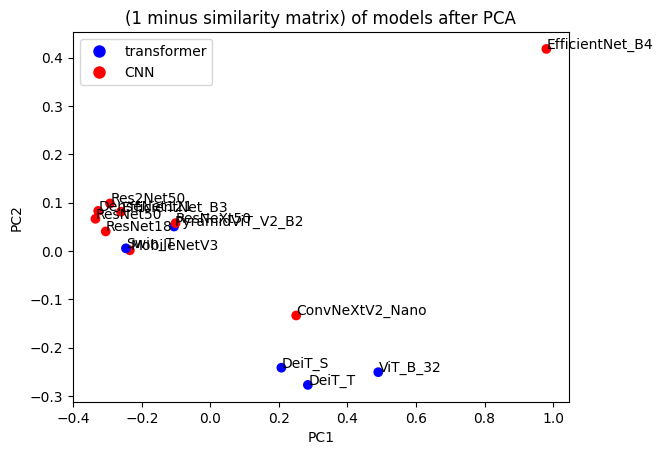

In [5]:
# plot pca of distances
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_distances)
df_distances_pca = pd.DataFrame(pca.transform(df_distances), index=df_distances.index, columns=['PC1', 'PC2'])

df_distances_pca['architecture'] = df_distances_pca.index.map(models_to_architecture_mapping)
plt.scatter(df_distances_pca['PC1'], df_distances_pca['PC2'], c=df_distances_pca['architecture'].map({'transformer': 'blue', 'CNN': 'red'}))
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('(1 minus similarity matrix) of models after PCA')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='transformer', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='CNN', markerfacecolor='red', markersize=10)
])
plt.savefig('pca_cosine.png')
plt.show()


## Clustering

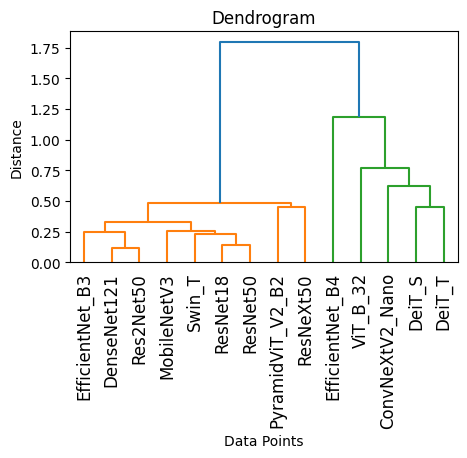

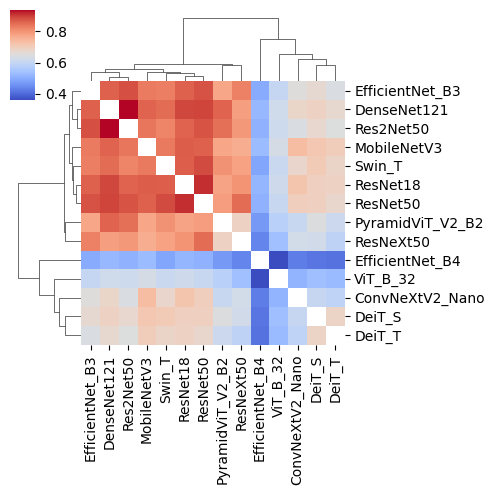

In [5]:
import numpy as np
from scipy.cluster import hierarchy
import seaborn as sns
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linkage_matrix = hierarchy.ward(df)

# Plot the dendrogram
plt.figure(figsize=(5, 3))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90)

plt.title('Dendrogram')
plt.ylabel('Distance')
plt.xlabel('Data Points')
plt.show()

# Optionally, you can use seaborn's clustermap to visualize clustered heatmap
sns.clustermap(df, method='ward', cmap='coolwarm', mask=mask, figsize=(5, 5))
plt.show()

t:\win_programs\python_venvs\master-thesis-cnn-vs-transformers\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


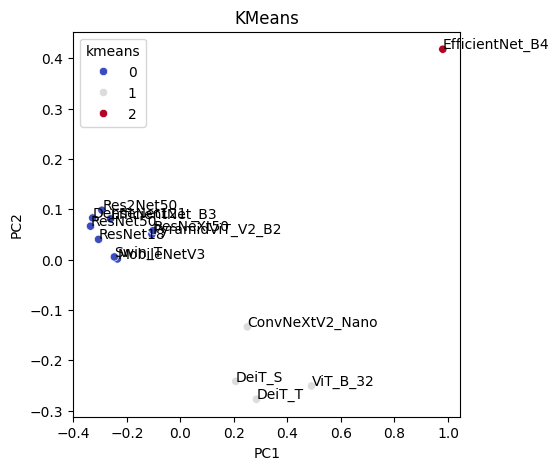

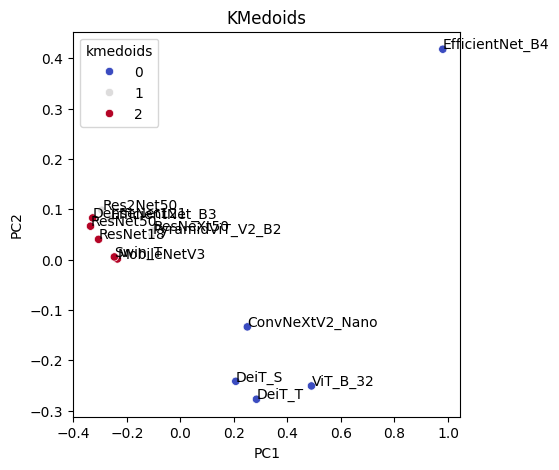

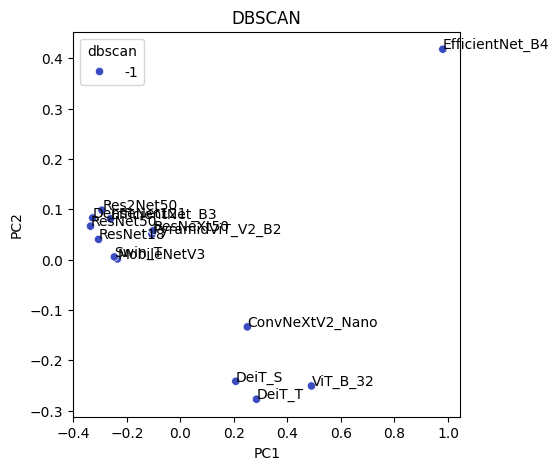

In [6]:
# plot 2d PCA of clustering results: k means, kmedoids and dbscan
from sklearn.cluster import KMeans, DBSCAN

# KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_distances)
df_distances_pca['kmeans'] = kmeans.labels_

# KMedoids
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(df_distances)
df_distances_pca['kmedoids'] = kmedoids.labels_

# DBSCAN
dbscan = DBSCAN(eps=0.1)
dbscan.fit(df_distances)
df_distances_pca['dbscan'] = dbscan.labels_

# plot 2d PCA of clustering results
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='kmeans', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('KMeans')
plt.show()

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='kmedoids', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('KMedoids')
plt.show()

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='dbscan', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('DBSCAN')
plt.show()

# Analysis of similarity matrix - RBF

In [6]:
import pandas as pd

df = pd.read_csv('20240410_1129_similarity_matrix_gradcam_rbf.csv', index_col=0)
df

,DeiT_S,DeiT_T,DenseNet121,EfficientNet_B3,EfficientNet_B4,ConvNeXtV2_Nano,PyramidViT_V2_B2,MobileNetV3,Swin_T,ResNet18,ResNet50,ResNeXt50,Res2Net50,ViT_B_32
DeiT_S,1.000000,0.043296,3.092575e-05,0.000475,3.728210e-04,0.010990,0.000018,0.007326,0.004441,0.005200,0.003717,0.001541,1.000695e-04,0.005493
DeiT_T,0.043296,1.000000,3.864004e-06,0.000430,4.097002e-04,0.015140,0.000014,0.006818,0.001883,0.005024,0.001960,0.001237,4.671621e-06,0.003701
DenseNet121,0.000031,0.000004,1.000000e+00,0.002452,1.334437e-07,0.000018,0.001387,0.000957,0.003494,0.001844,0.002222,0.000526,4.022278e-02,0.000071
EfficientNet_B3,0.000475,0.000430,2.452404e-03,1.000000,3.075755e-05,0.002620,0.000338,0.016581,0.014025,0.039265,0.052223,0.053208,3.784345e-03,0.001399
EfficientNet_B4,0.000373,0.000410,1.334437e-07,0.000031,1.000000e+00,0.000927,0.000003,0.000569,0.000048,0.000419,0.000163,0.000161,2.823062e-09,0.000626
ConvNeXtV2_Nano,0.010990,0.015140,1.798291e-05,0.002620,9.269854e-04,1.000000,0.000033,0.038266,0.008684,0.031241,0.013774,0.011402,1.769679e-05,0.017829
PyramidViT_V2_B2,0.000018,0.000014,1.386856e-03,0.000338,3.130971e-06,0.000033,1.000000,0.000184,0.000836,0.000523,0.000532,0.000062,7.600416e-04,0.000033
MobileNetV3,0.007326,0.006818,9.572170e-04,0.016581,5.689762e-04,0.038266,0.000184,1.000000,0.027775,0.080153,0.054227,0.020405,3.201493e-04,0.008563
Swin_T,0.004441,0.001883,3.494246e-03,0.014025,4.843795e-05,0.008684,0.000836,0.027775,1.000000,0.039547,0.050854,0.022481,5.659397e-04,0.006460
ResNet18,0.005200,0.005024,1.844367e-03,0.039265,4.191537e-04,0.031241,0.000523,0.080153,0.039547,1.000000,0.145763,0.056565,1.441428e-03,0.006691


## Heatmap

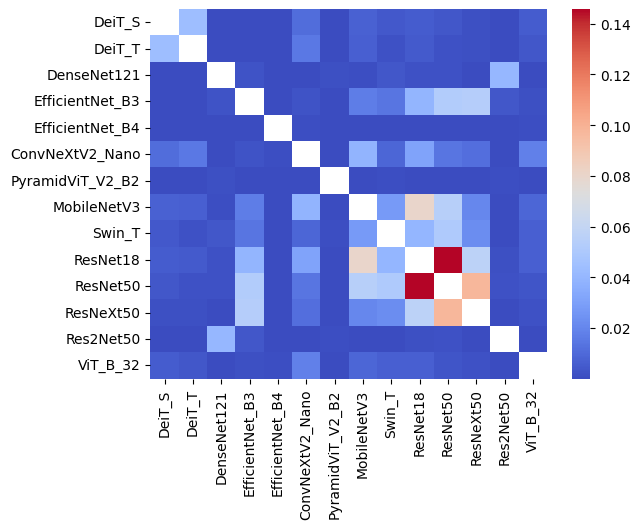

In [7]:
# plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mask = np.eye(df.shape[0], dtype=bool)
sns.heatmap(df, mask=mask, cmap='coolwarm')
plt.show()

## PCA of distances

In [8]:
# PCA of distances
df_distances = 1 - df
df_distances

,DeiT_S,DeiT_T,DenseNet121,EfficientNet_B3,EfficientNet_B4,ConvNeXtV2_Nano,PyramidViT_V2_B2,MobileNetV3,Swin_T,ResNet18,ResNet50,ResNeXt50,Res2Net50,ViT_B_32
DeiT_S,0.000000,0.956704,0.999969,0.999525,0.999627,0.989010,0.999982,0.992674,0.995559,0.994800,0.996283,0.998459,0.999900,0.994507
DeiT_T,0.956704,0.000000,0.999996,0.999570,0.999590,0.984860,0.999986,0.993182,0.998117,0.994976,0.998040,0.998763,0.999995,0.996299
DenseNet121,0.999969,0.999996,0.000000,0.997548,1.000000,0.999982,0.998613,0.999043,0.996506,0.998156,0.997778,0.999474,0.959777,0.999929
EfficientNet_B3,0.999525,0.999570,0.997548,0.000000,0.999969,0.997380,0.999662,0.983419,0.985975,0.960735,0.947777,0.946792,0.996216,0.998601
EfficientNet_B4,0.999627,0.999590,1.000000,0.999969,0.000000,0.999073,0.999997,0.999431,0.999952,0.999581,0.999837,0.999839,1.000000,0.999374
ConvNeXtV2_Nano,0.989010,0.984860,0.999982,0.997380,0.999073,0.000000,0.999967,0.961734,0.991316,0.968759,0.986226,0.988598,0.999982,0.982171
PyramidViT_V2_B2,0.999982,0.999986,0.998613,0.999662,0.999997,0.999967,0.000000,0.999816,0.999164,0.999477,0.999468,0.999938,0.999240,0.999967
MobileNetV3,0.992674,0.993182,0.999043,0.983419,0.999431,0.961734,0.999816,0.000000,0.972225,0.919847,0.945773,0.979595,0.999680,0.991437
Swin_T,0.995559,0.998117,0.996506,0.985975,0.999952,0.991316,0.999164,0.972225,0.000000,0.960453,0.949146,0.977519,0.999434,0.993540
ResNet18,0.994800,0.994976,0.998156,0.960735,0.999581,0.968759,0.999477,0.919847,0.960453,0.000000,0.854237,0.943435,0.998559,0.993309


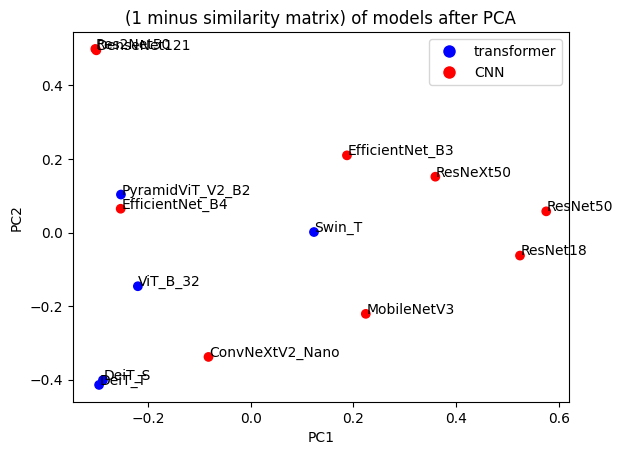

In [9]:
# plot pca of distances
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_distances)
df_distances_pca = pd.DataFrame(pca.transform(df_distances), index=df_distances.index, columns=['PC1', 'PC2'])

df_distances_pca['architecture'] = df_distances_pca.index.map(models_to_architecture_mapping)
plt.scatter(df_distances_pca['PC1'], df_distances_pca['PC2'], c=df_distances_pca['architecture'].map({'transformer': 'blue', 'CNN': 'red'}))
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('(1 minus similarity matrix) of models after PCA')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='transformer', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='CNN', markerfacecolor='red', markersize=10)
])
plt.savefig('pca_rbf.png')
plt.show()

## Clustering

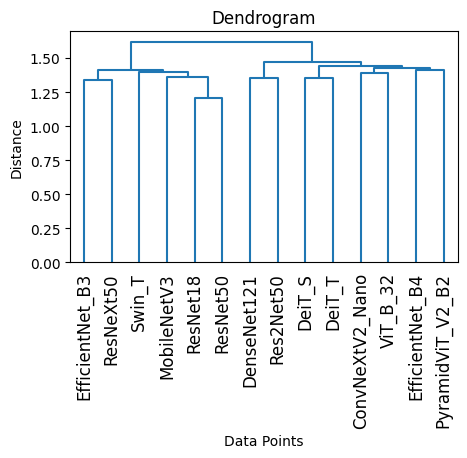

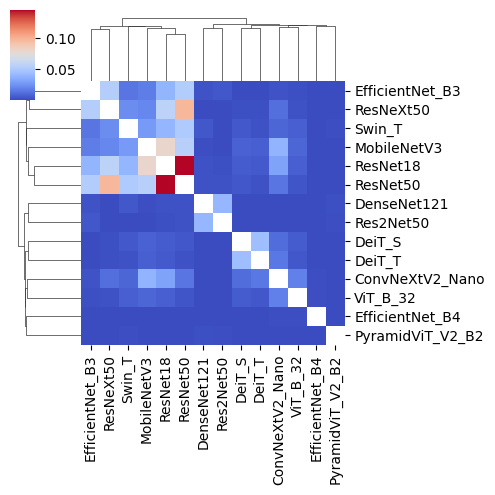

In [11]:
import numpy as np
from scipy.cluster import hierarchy
import seaborn as sns
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linkage_matrix = hierarchy.ward(df)

# Plot the dendrogram
plt.figure(figsize=(5, 3))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90)

plt.title('Dendrogram')
plt.ylabel('Distance')
plt.xlabel('Data Points')
plt.show()

# Optionally, you can use seaborn's clustermap to visualize clustered heatmap
sns.clustermap(df, method='ward', cmap='coolwarm', mask=mask, figsize=(5, 5))
plt.show()

t:\win_programs\python_venvs\master-thesis-cnn-vs-transformers\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


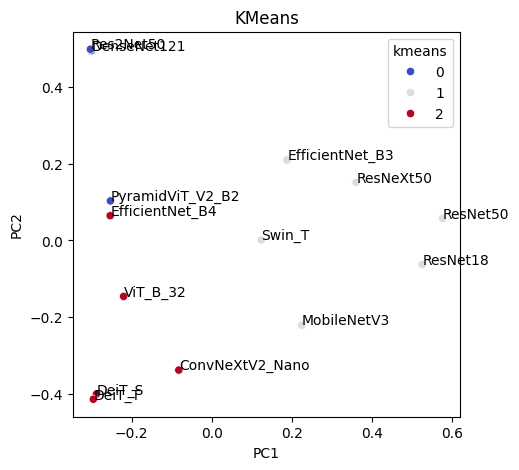

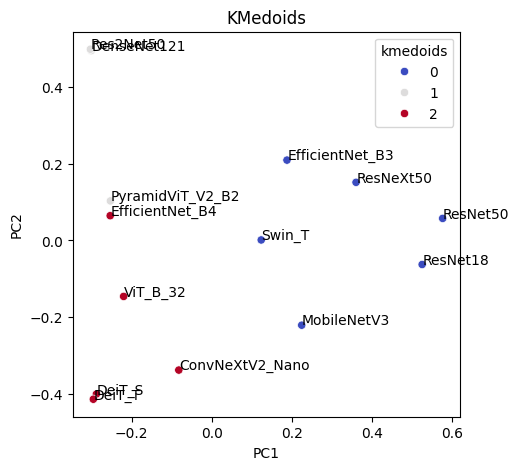

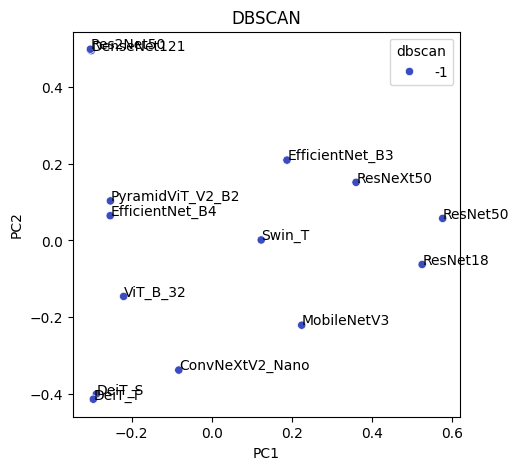

In [12]:
# plot 2d PCA of clustering results: k means, kmedoids and dbscan
from sklearn.cluster import KMeans, DBSCAN

# KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_distances)
df_distances_pca['kmeans'] = kmeans.labels_

# KMedoids
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(df_distances)
df_distances_pca['kmedoids'] = kmedoids.labels_

# DBSCAN
dbscan = DBSCAN(eps=1)
dbscan.fit(df_distances)
df_distances_pca['dbscan'] = dbscan.labels_

# plot 2d PCA of clustering results
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='kmeans', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('KMeans')
plt.show()

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='kmedoids', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('KMedoids')
plt.show()

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='dbscan', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('DBSCAN')
plt.show()